# Excersice 4

Feature selection:

1. You need to load the UCI Arrhythmia dataset
https://archive.ics.uci.edu/ml/datasets/arrhythmia
* the problem is a multi-class classification

2. For comparing the result you need to use kNN (k=3), and compare based on the accuracy with the original dataset (with the all features).

2. Run three different types of feature selection methods (Univariate Statistics, model based, and Iterative Feature Selection).
* The original data set has 279 features.
* You need to run the methods for number_of_features= 20, 50, 100, 150, 200
* All the results should show in the same figure (At the end we have just one figure)

In [11]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import libraries
%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 9]


In [12]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'arrhythmia.data', header=None)

# Print shape of our data
print(df.shape)

# Replace missing '?' values by NaN
df = df.replace('?', np.NaN)

# Summarize the rows with missing values for each column
for i in df.columns:
    # Count number of rows with missing values
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    if(perc[i] > 0):
        print('Column %d is missing %d values (%.1f%%)' % (i, n_miss, perc))


(452, 280)
Column 10 is missing 8 values (1.8%)
Column 11 is missing 22 values (4.9%)
Column 12 is missing 1 values (0.2%)
Column 13 is missing 376 values (83.2%)
Column 14 is missing 1 values (0.2%)


In [13]:
# Drop column 13 as it's full of missing values
df.drop(columns=[13], inplace=True)

# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Replace missing values by the mean
# Define imputer
imputer = SimpleImputer(strategy='mean')
# Fit on the dataset
imputer.fit(X)
# Transform the dataset
X = imputer.transform(X)


In [14]:
scores_A = []

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Evaluate score with the original dataset
score = KNeighborsClassifier(n_neighbors=3).fit(
    X_train, Y_train).score(X_test, Y_test)
format_score = "{:.3f}".format(score)
scores_A.append(float(format_score))

number_of_features = [20, 50, 100, 150, 200]

for features in number_of_features:

    # Split train and test
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    # Scaling the data (MIN MAX Scaling)
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Feature selection
    sel_chi2 = SelectKBest(chi2, k=features)            # Select k features
    X_train = sel_chi2.fit_transform(X_train, Y_train)  # Fit transform train set
    X_test = sel_chi2.transform(X_test)                 # Transform X_test

    # Evaluate score
    score = KNeighborsClassifier(n_neighbors=3).fit(
        X_train, Y_train).score(X_test, Y_test)
    format_score = "{:.3f}".format(score)
    scores_A.append(float(format_score))

print(scores_A)

[0.549, 0.593, 0.611, 0.549, 0.566, 0.54]


In [15]:
scores_B = []

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Evaluate score with the original dataset
score = KNeighborsClassifier(n_neighbors=3).fit(
    X_train, Y_train).score(X_test, Y_test)
format_score = "{:.3f}".format(score)
scores_B.append(float(format_score))

number_of_features = [20, 50, 100, 150, 200]

for features in number_of_features:

    # Split train and test
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    # Scaling the data (MIN MAX Scaling)
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Feature selection
    clf = ExtraTreesClassifier(n_estimators=features)
    clf = clf.fit(X_train, Y_train)
    model = SelectFromModel(clf)
    X_train = model.fit_transform(X_train, Y_train)
    X_test = model.transform(X_test)   

    # Evaluate score
    score = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train).score(X_test, Y_test)
    format_score = "{:.3f}".format(score)
    scores_B.append(float(format_score))

print(scores_B)

[0.549, 0.602, 0.611, 0.611, 0.611, 0.602]


In [16]:
scores_C = []

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Evaluate score with the original dataset
score = KNeighborsClassifier(n_neighbors=3).fit(
    X_train, Y_train).score(X_test, Y_test)
format_score = "{:.3f}".format(score)
scores_C.append(float(format_score))

number_of_features = [20, 50, 100, 150, 200]

for features in number_of_features:

    # Split train and test
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    # Scaling the data (MIN MAX Scaling)
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=features)
    # Fit transform train set
    X_train = select.fit_transform(X_train, Y_train)
    # Transform X_test
    X_test = select.transform(X_test)

    # Evaluate score
    score = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train).score(X_test, Y_test)
    format_score = "{:.3f}".format(score)
    scores_C.append(float(format_score))

print(scores_C)


[0.549, 0.619, 0.611, 0.575, 0.593, 0.584]


In [17]:
# Show results
frame = {'Univariate Statistics': scores_A,
         'Model based': scores_B, 'Iterative Selection': scores_C}
result = pd.DataFrame(frame, index=[
                      "Original", "20 features", "50 features", "100 features", "150 features", "200 features"])
result


,Univariate Statistics,Model based,Iterative Selection
Original,0.549,0.549,0.549
20 features,0.593,0.602,0.619
50 features,0.611,0.611,0.611
100 features,0.549,0.611,0.575
150 features,0.566,0.611,0.593
200 features,0.540,0.602,0.584


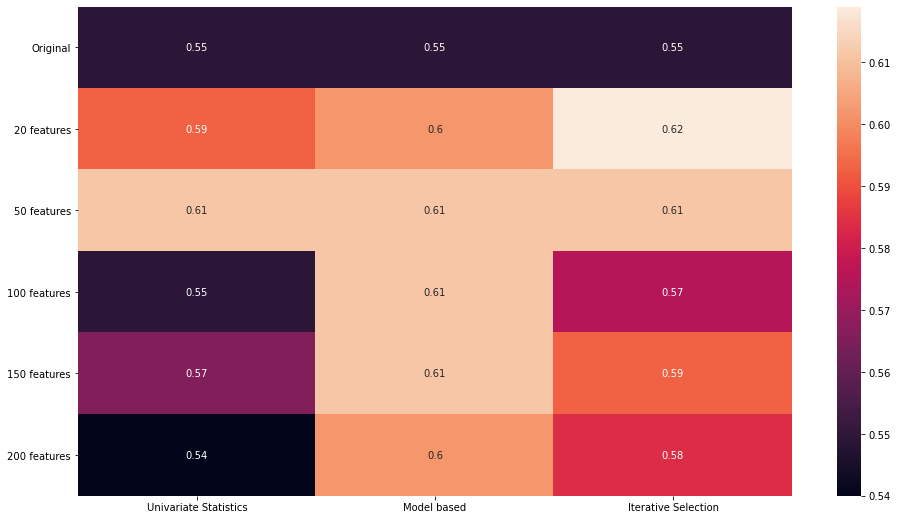

In [18]:
# Plot results on a heatmap
sns.heatmap(result, annot=True)
plt.yticks(rotation=0) 
plt.show()